In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-deep')
sns.set(font_scale=1.5)

#missing data visualization
import missingno as msno 

#ignore warning
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


/tmp/ipykernel_18/2499437468.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


In [2]:
df_train= pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
for col in df_train.columns:
    msg = 'column: {:>10}\n Percent of NaN value : {:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)                       

column: PassengerId
 Percent of NaN value : 0.00%
column:   Survived
 Percent of NaN value : 0.00%
column:     Pclass
 Percent of NaN value : 0.00%
column:       Name
 Percent of NaN value : 0.00%
column:        Sex
 Percent of NaN value : 0.00%
column:        Age
 Percent of NaN value : 19.87%
column:      SibSp
 Percent of NaN value : 0.00%
column:      Parch
 Percent of NaN value : 0.00%
column:     Ticket
 Percent of NaN value : 0.00%
column:       Fare
 Percent of NaN value : 0.00%
column:      Cabin
 Percent of NaN value : 77.10%
column:   Embarked
 Percent of NaN value : 0.22%


In [7]:
for col in df_test.columns:
    msg = 'column: {:>10}\n Percent of NaN value : {:.2f}%'.format(col,100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)                       

column: PassengerId
 Percent of NaN value : 0.00%
column:     Pclass
 Percent of NaN value : 0.00%
column:       Name
 Percent of NaN value : 0.00%
column:        Sex
 Percent of NaN value : 0.00%
column:        Age
 Percent of NaN value : 20.57%
column:      SibSp
 Percent of NaN value : 0.00%
column:      Parch
 Percent of NaN value : 0.00%
column:     Ticket
 Percent of NaN value : 0.00%
column:       Fare
 Percent of NaN value : 0.24%
column:      Cabin
 Percent of NaN value : 78.23%
column:   Embarked
 Percent of NaN value : 0.00%


<Axes: >

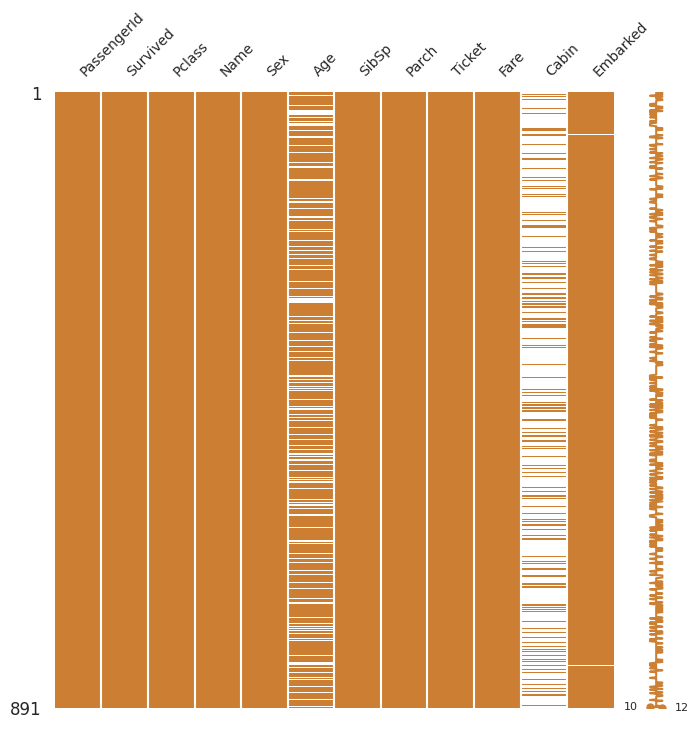

In [8]:
msno.matrix(df=df_train.iloc[:,:] , fontsize= 10,figsize=(8,8), color = (0.8,0.5,0.2))

<Axes: >

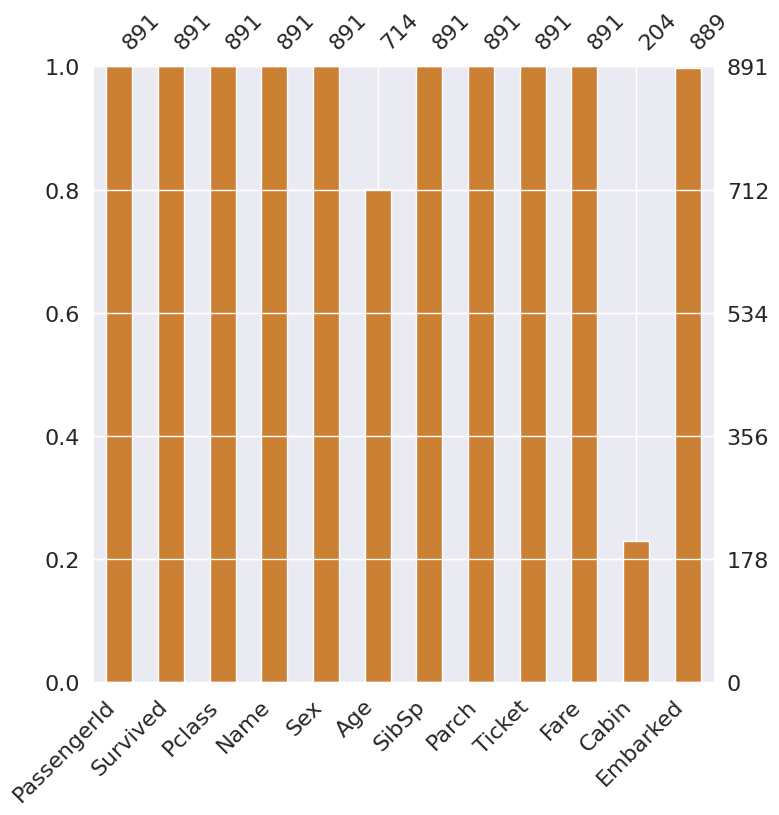

In [9]:
msno.bar(df=df_train.iloc[:,:] , figsize=(8,8), color = (0.8,0.5,0.2))

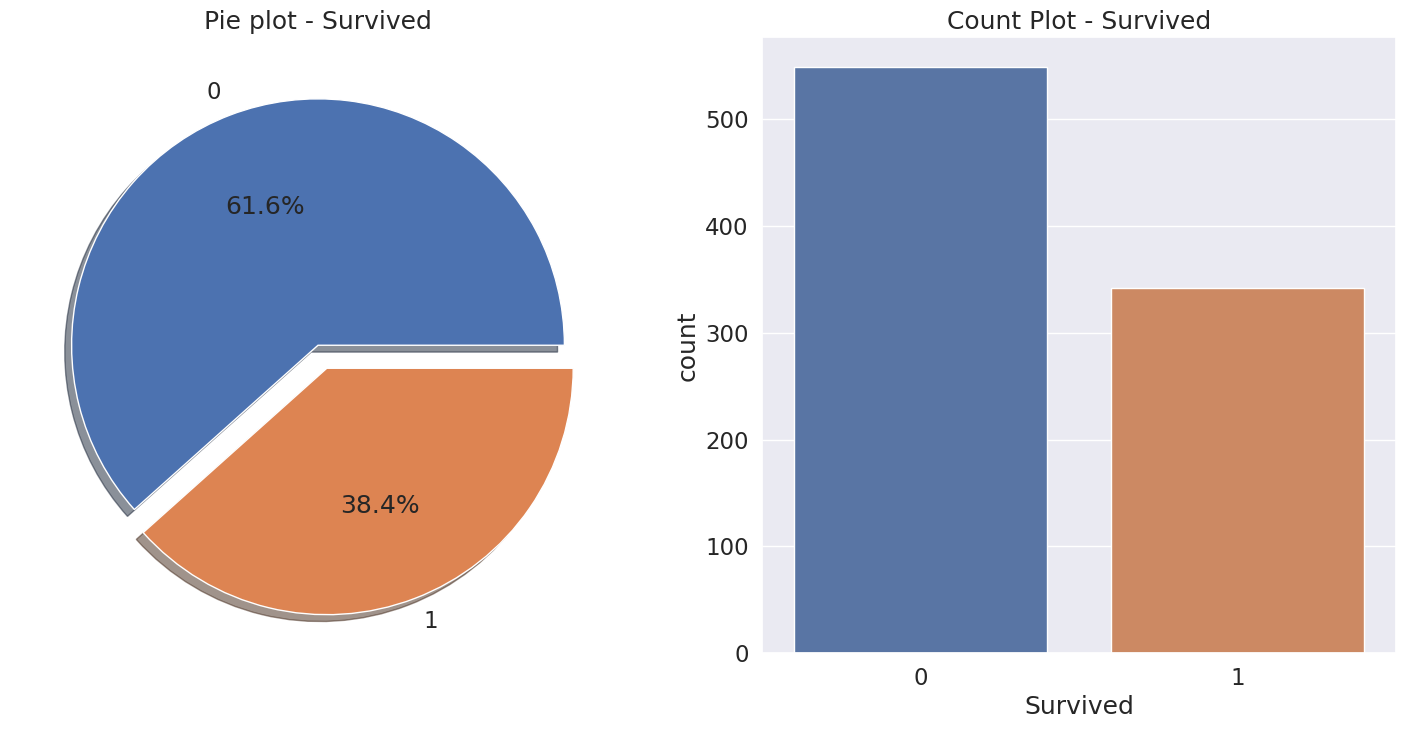

In [10]:
f, ax = plt.subplots(1,2, figsize = (18,8))

# Pie plot 
df_train['Survived'].value_counts().plot.pie(explode = [0,0.1],autopct = '%1.1f%%',ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

# Count plot
sns.countplot(data = df_train, x = 'Survived', ax = ax[1])
ax[1].set_title('Count Plot - Survived')

plt.show()

**Exploratory data analysis(EDA)**

1. Pclass

In [11]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='Blues')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

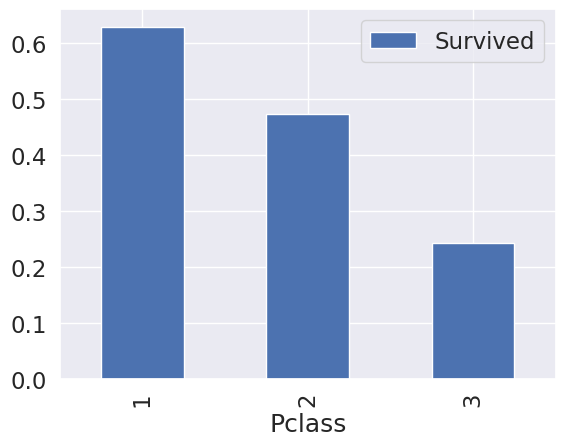

In [13]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index = True).mean().sort_values(by='Survived',ascending = False).plot.bar()

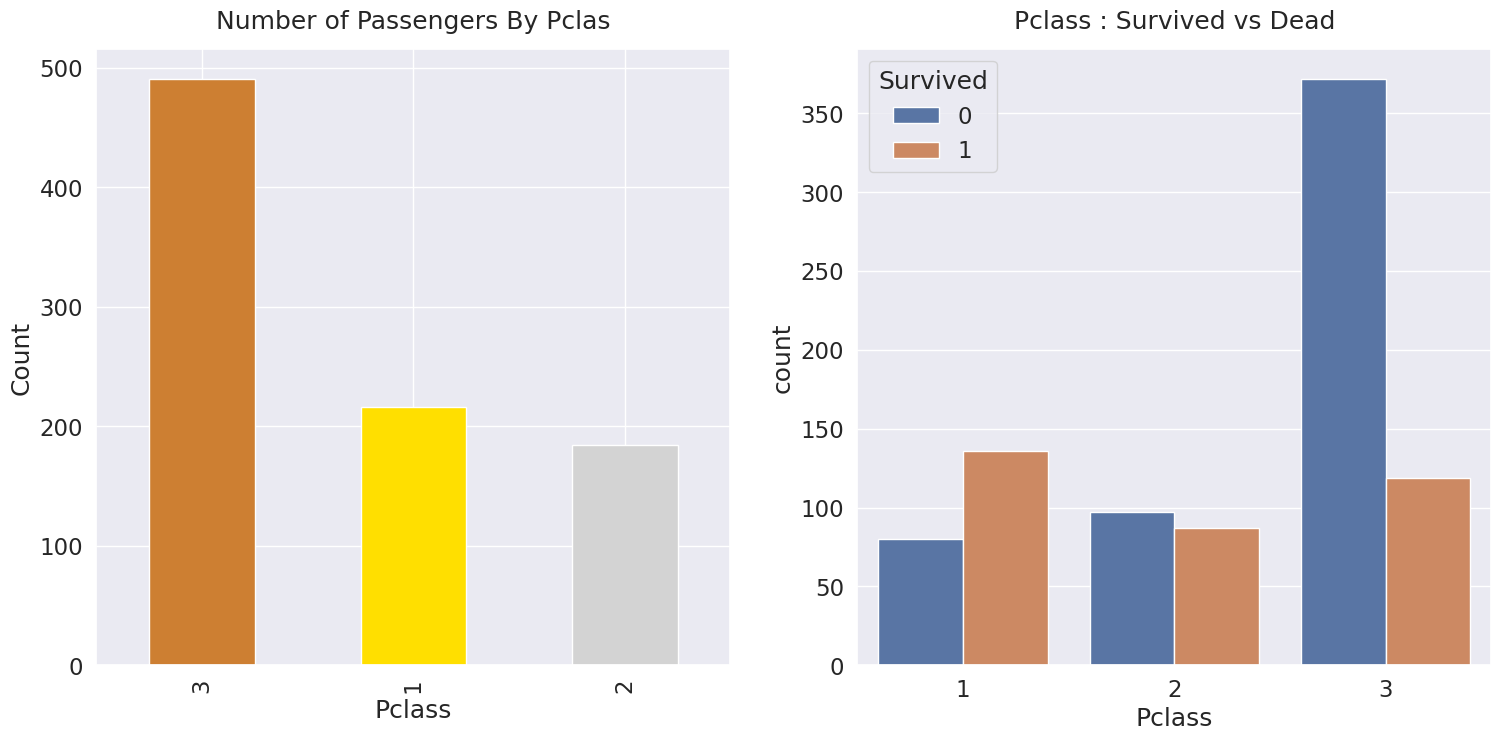

In [14]:
y_position = 1.02
f , ax = plt.subplots(1,2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclas', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot(x= 'Pclass',hue = 'Survived',data = df_train,ax = ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)
plt.show()

2. Sex

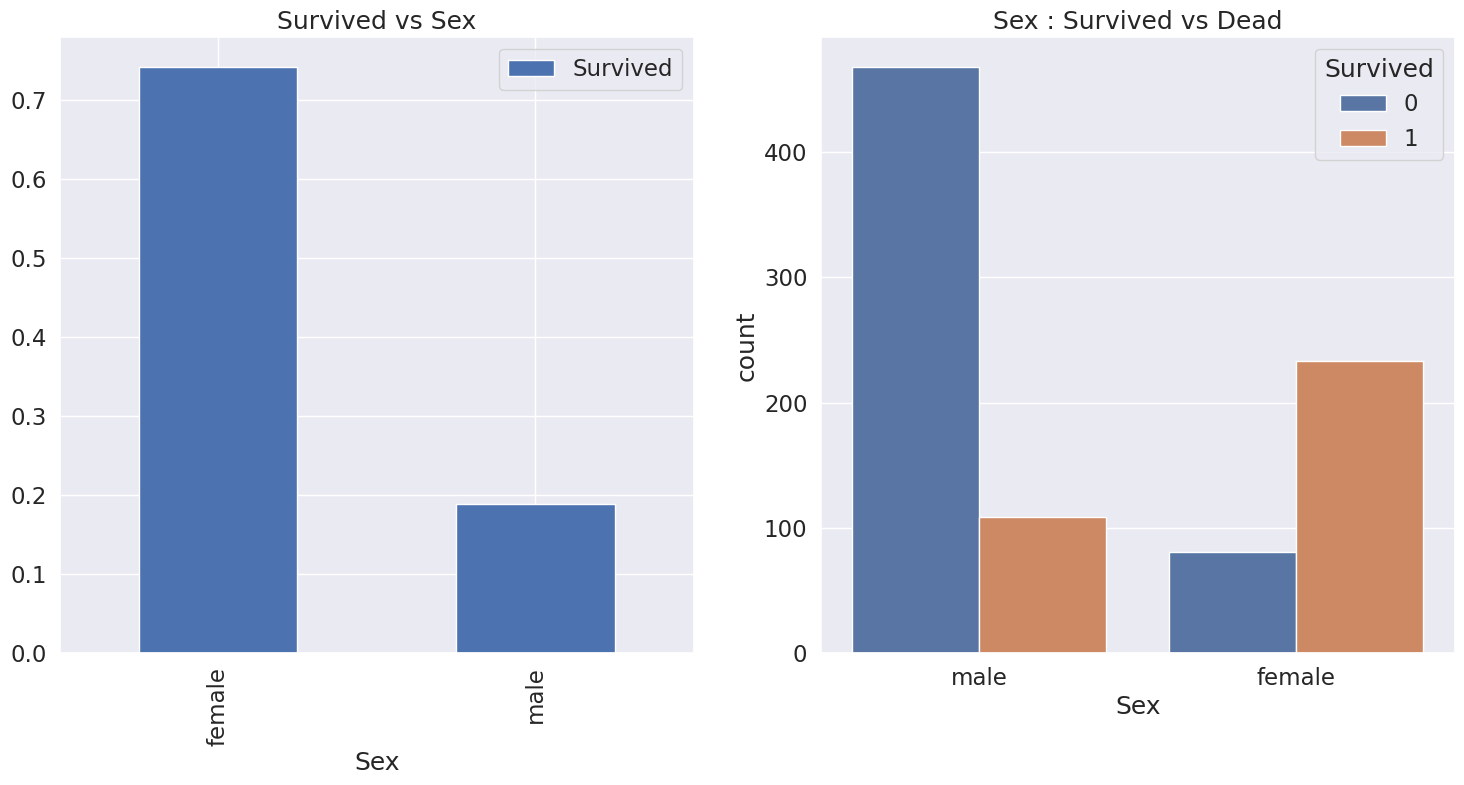

In [15]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index = True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x= 'Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

In [16]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().sort_values(by='Survived',ascending = True)

,Survived
Sex,
male,0.188908
female,0.742038


In [17]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap = 'Blues')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


2.5 Both Sex and Pclass

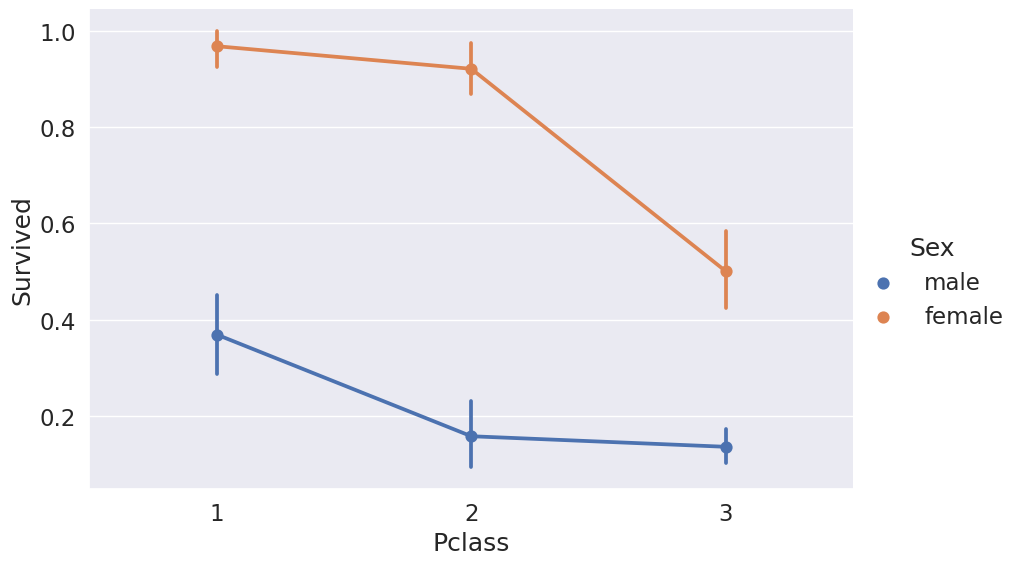

In [18]:
sns.catplot(data = df_train, x='Pclass',y='Survived',hue = 'Sex',kind = 'point',height = 6, aspect = 1.5)

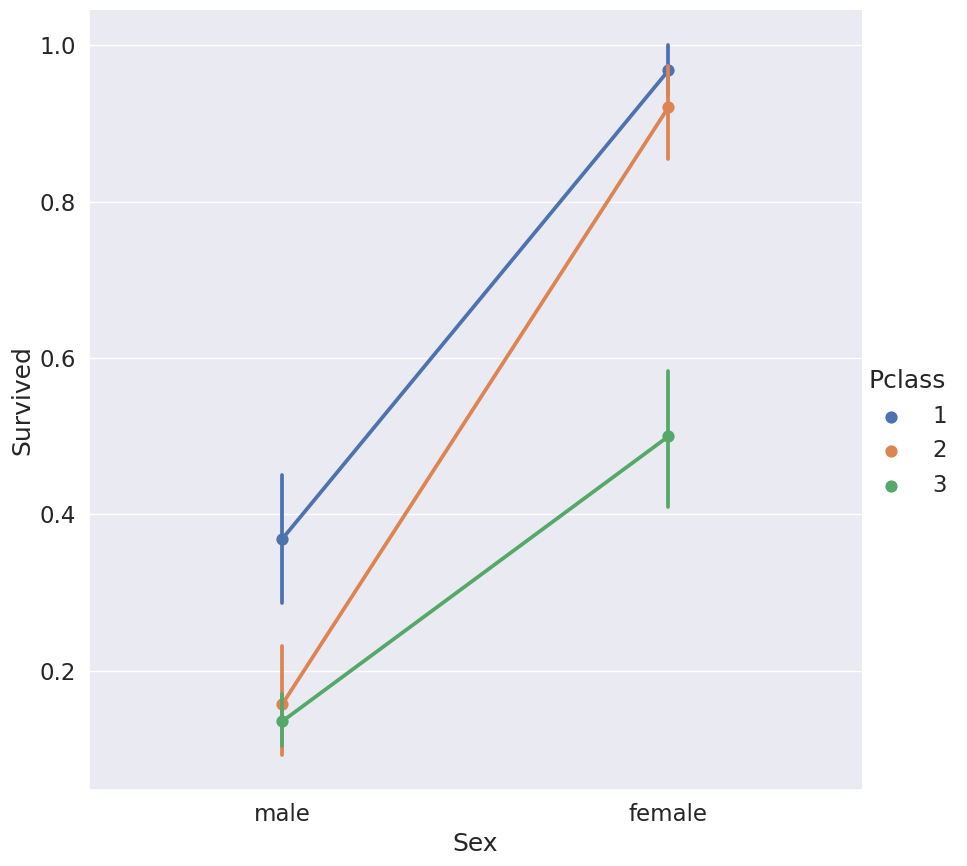

In [19]:
sns.catplot(data = df_train, x= 'Sex',y='Survived',hue='Pclass',kind = 'point', height = 9, aspect =1)

3. Age

In [20]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


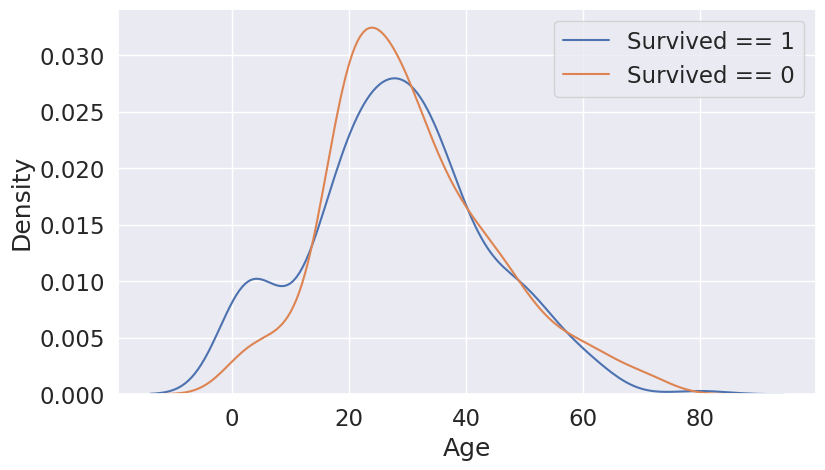

In [21]:
fig, ax = plt.subplots(1,1,figsize = (9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'],ax =ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'],ax = ax)
plt.legend(['Survived == 1','Survived == 0'])
plt.show()

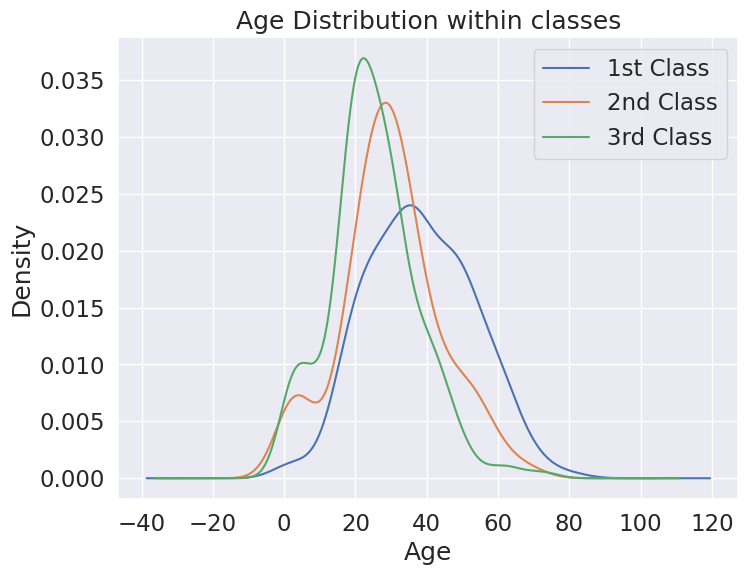

In [22]:
#Age distribution withing classes
plt.figure(figsize = (8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

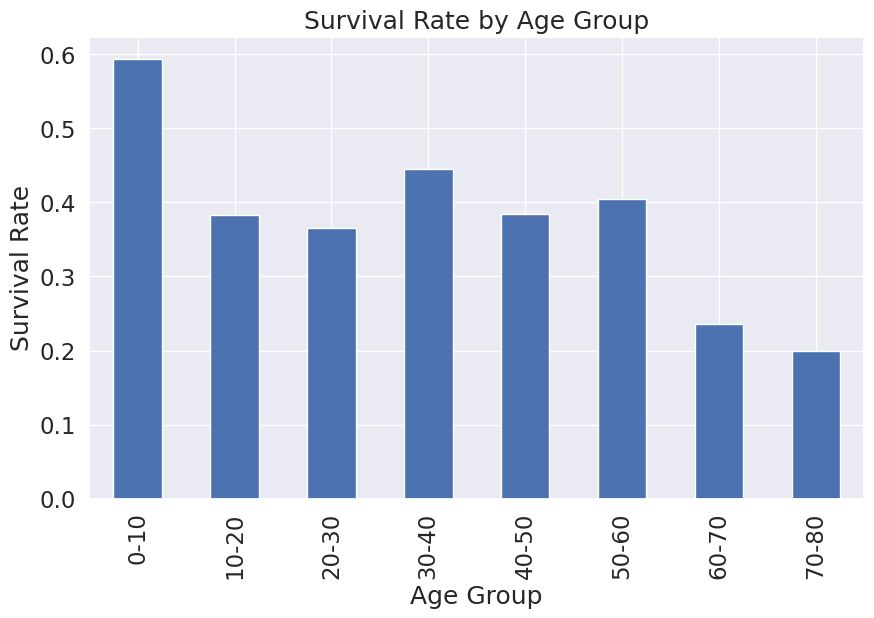

In [23]:

# 나이 구간 정의
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=bins, labels=labels)

# 각 구간별 생존율 계산
age_group_survival = df_train.groupby('AgeGroup')['Survived'].mean()

# 시각화
plt.figure(figsize=(10,6))
age_group_survival.plot(kind='bar')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()


**3.5 Pclass , Sex, Age**

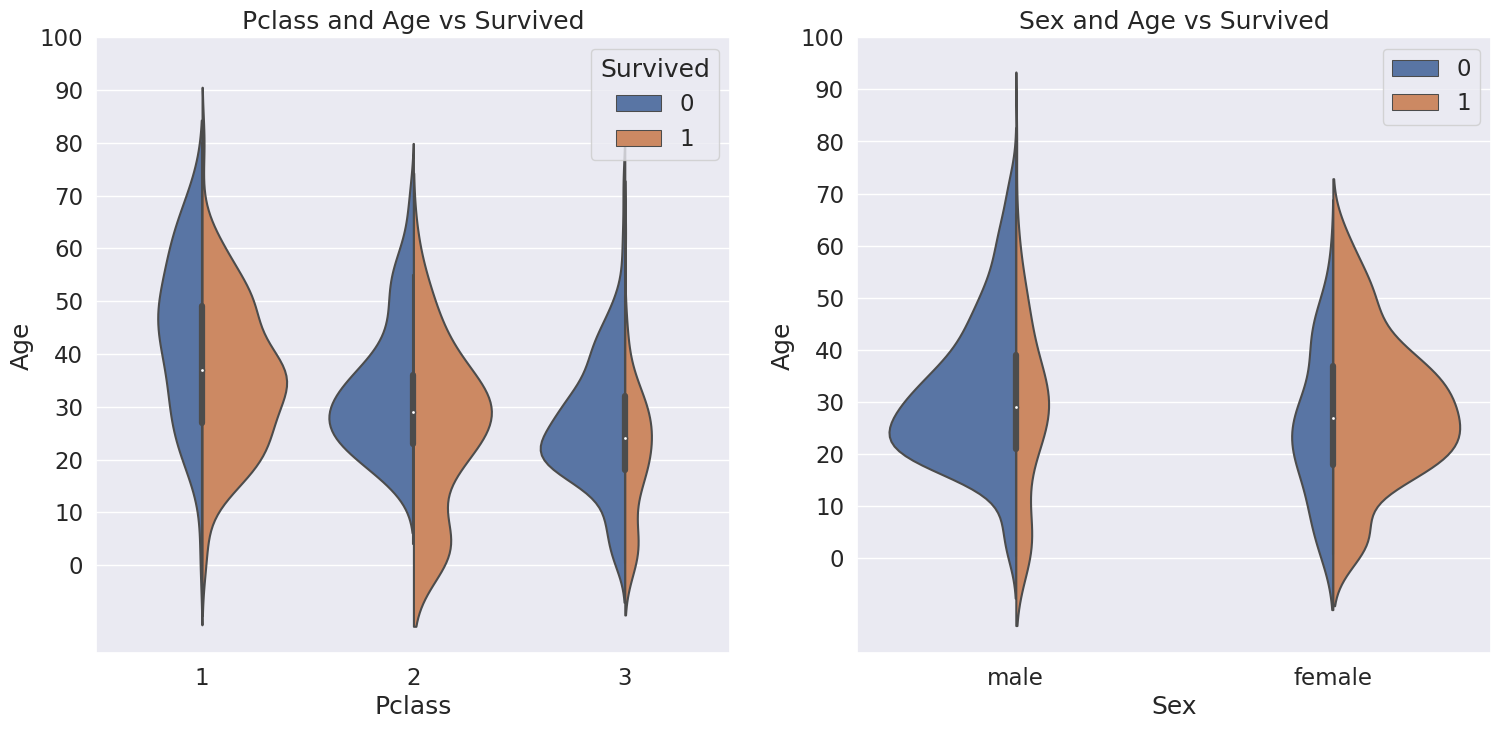

In [24]:
f , ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = "Pclass", y ="Age", hue = "Survived", data = df_train, scale='count',split = True,ax =ax[0])
sns.violinplot(x = "Sex", y = "Age", hue = "Survived", data = df_train,scale = 'count', split = True,ax = ax[1])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
ax[1].legend(loc = 'upper right')
plt.show()

**4. Embarked**

<Axes: xlabel='Embarked'>

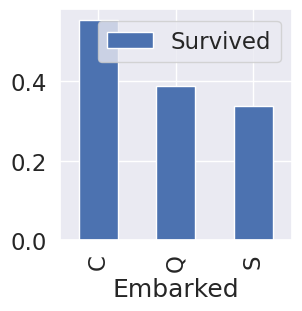

In [25]:
f , ax = plt.subplots(1,1,figsize = (3,3))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax=ax)

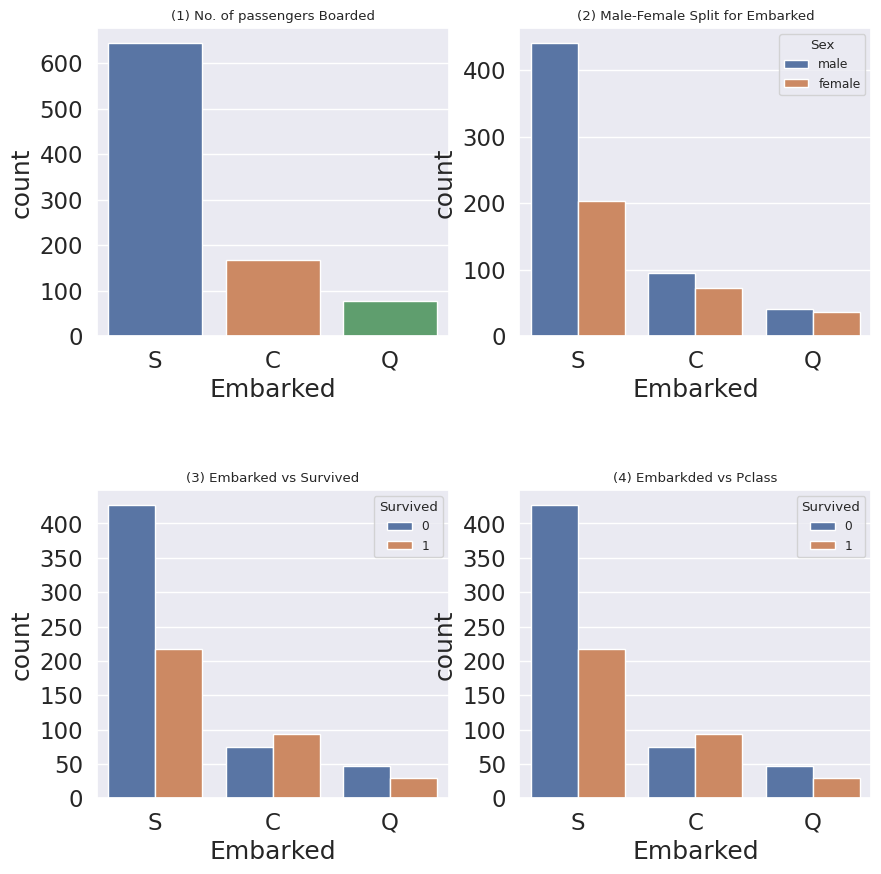

In [26]:
f , ax = plt.subplots(2,2, figsize = (10,10))
sns.set(font_scale = 0.8)
sns.countplot(x ='Embarked',data= df_train, ax = ax[0,0])
ax[0,0].set_title('(1) No. of passengers Boarded')
sns.countplot(x = 'Embarked', hue = 'Sex' , data = df_train, ax = ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x = 'Embarked', hue = 'Survived', data = df_train, ax = ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x = 'Embarked' , hue = 'Survived' , data = df_train, ax = ax[1,1])
ax[1,1].set_title('(4) Embarkded vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

**5. Family - SibSp + Parch**

In [27]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [28]:
print('Maximum size of Family : ' , df_train['FamilySize'].max())
print('Minimum size of Family : ' , df_train['FamilySize'].min())

Maximum size of Family :  11
Minimum size of Family :  1


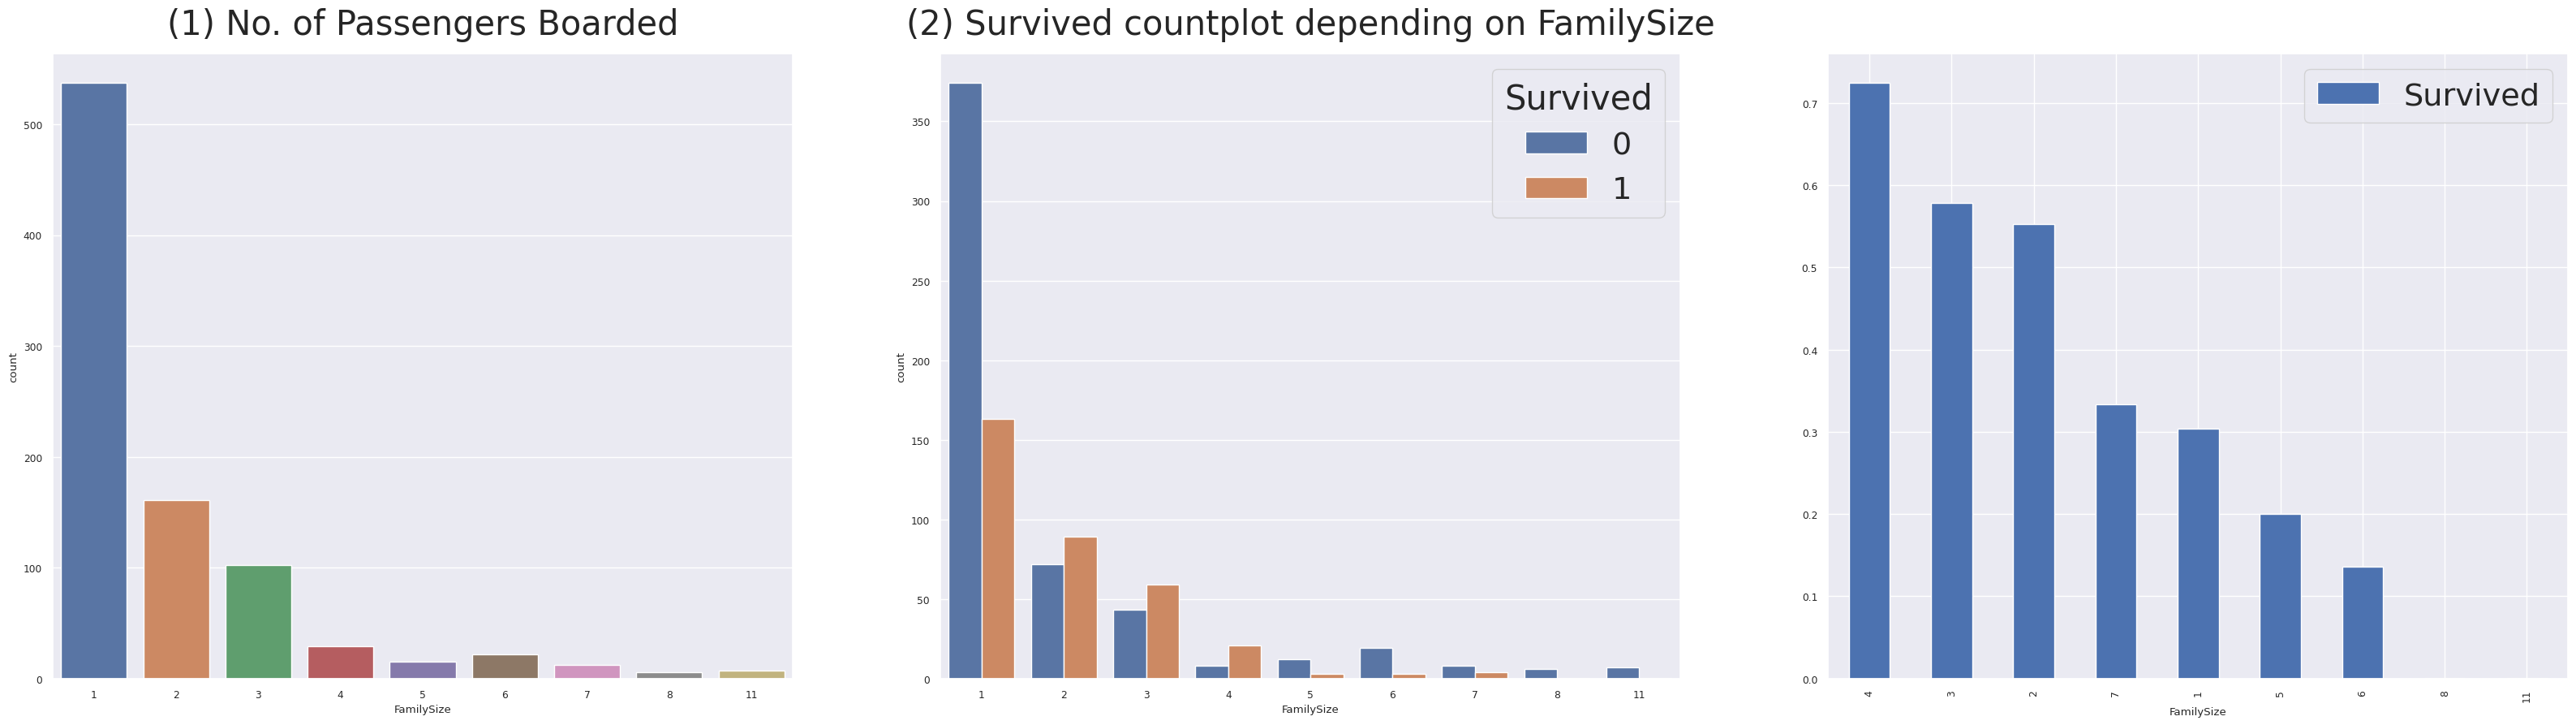

In [29]:
f, ax = plt.subplots(1,3,figsize = (40,10))
sns.set(font_scale = 2.5)
sns.countplot(x = 'FamilySize' , data = df_train , ax = ax[0])
sns.countplot(x = 'FamilySize', hue = 'Survived' , data = df_train, ax = ax[1])
ax[0].set_title('(1) No. of Passengers Boarded', y = 1.02)
ax[1].set_title('(2) Survived countplot depending on FamilySize', y = 1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[2])

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

**6. Fare**

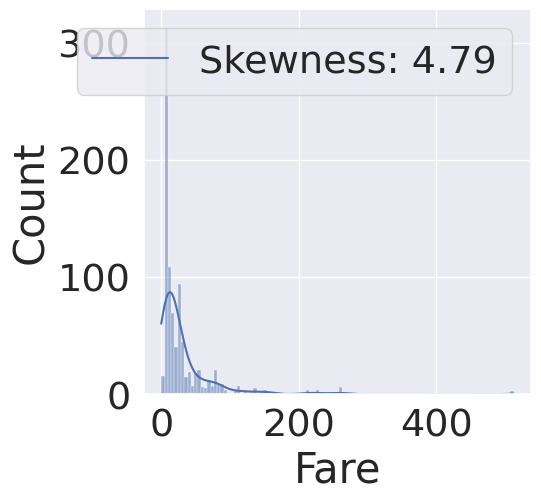

In [30]:
f, ax = plt.subplots(1,1, figsize = (5,5))

sns.histplot(df_train['Fare'],color='b',kde = True,ax=ax)
Skewness = df_train['Fare'].skew()
ax.legend(['Skewness: {:.2f}'.format(Skewness)],loc = 'best')

plt.show()

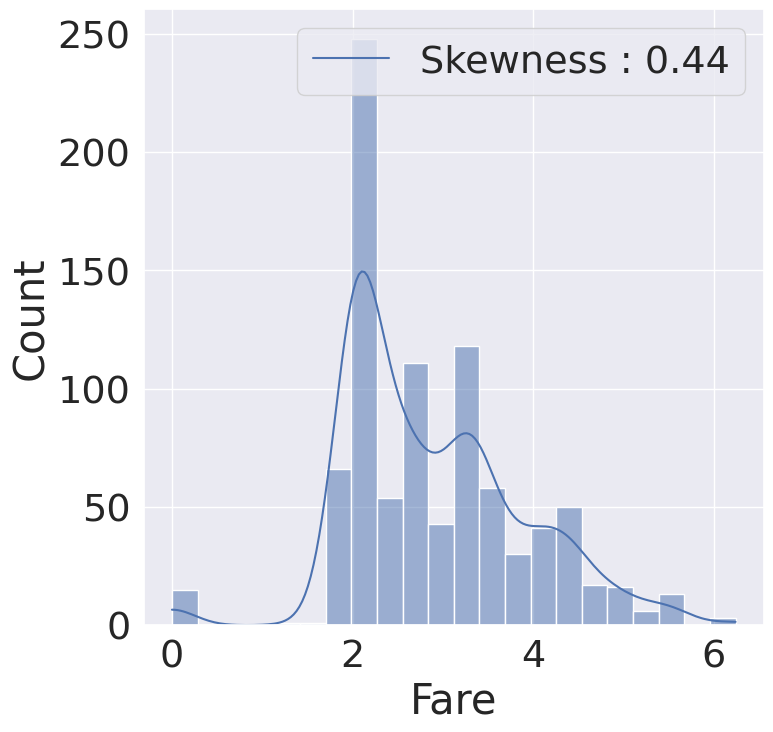

In [31]:
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i>0 else 0)

skewness = df_train['Fare'].skew()

f, ax = plt.subplots(1,1, figsize = (8,8))
sns.histplot(df_train['Fare'],color = 'b', kde = True, ax = ax)
ax.legend(['Skewness : {:.2f}'.format(skewness)],loc = 'best')

**7. Ticket**

In [32]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

**Fill Null**

In [33]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
FamilySize       0
dtype: int64

In [34]:
df_train['Name'][:10]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [35]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')

In [36]:
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [37]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [38]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

<Axes: xlabel='Initial'>

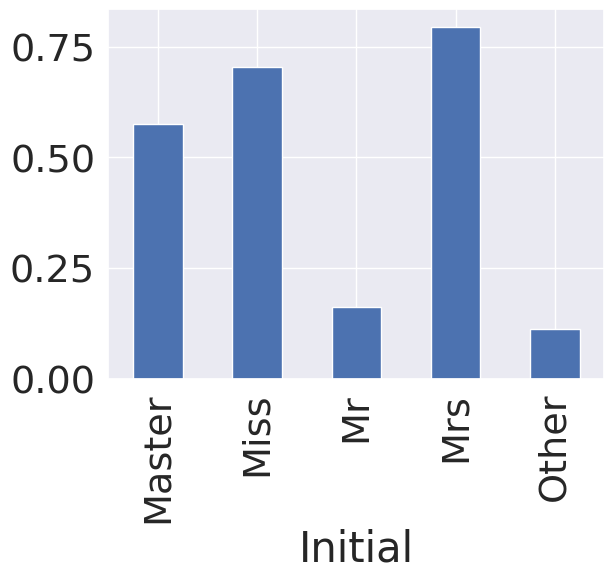

In [39]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [40]:
df_train.groupby('Initial').mean(any)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [41]:
df_train.loc[(df_train['Age'].isnull())&(df_train['Initial'] == 'Mr'),'Age'] = 32.7
df_train.loc[(df_train['Age'].isnull())&(df_train['Initial'] == 'Miss'),'Age'] = 21.8
df_train.loc[(df_train['Age'].isnull())&(df_train['Initial'] == 'Master'),'Age'] = 4.5
df_train.loc[(df_train['Age'].isnull())&(df_train['Initial'] == 'Mrs'),'Age'] = 35.9
df_train.loc[(df_train['Age'].isnull())&(df_train['Initial'] == 'Other'),'Age'] = 45.8


In [42]:
df_test.loc[(df_test['Age'].isnull())&(df_test['Initial'] == 'Mr'),'Age'] = 32.7
df_test.loc[(df_test['Age'].isnull())&(df_test['Initial'] == 'Miss'),'Age'] = 21.8
df_test.loc[(df_test['Age'].isnull())&(df_test['Initial'] == 'Master'),'Age'] = 4.5
df_test.loc[(df_test['Age'].isnull())&(df_test['Initial'] == 'Mrs'),'Age'] = 35.9
df_test.loc[(df_test['Age'].isnull())&(df_test['Initial'] == 'Other'),'Age'] = 45.8

**Fill Null in Embarked**

In [43]:
df_train['Embarked'].fillna('S',inplace = True)

**Change Age(continuos to categorical)**

In [44]:
df_train['Age_cat'] = 0

In [45]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [46]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,20-30,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,30-40,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,20-30,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,30-40,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,30-40,1,Mr,3


In [47]:
def category_age(x):
    if x<10:
        return 0;
    elif x<20:
        return 1
    elif x<30:
        return 2
    elif x<40:
        return 3
    elif x<50:
        return 4
    elif x<60:
        return 5
    elif x<70:
        return 6
    else:
        return 7
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [48]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

True

In [49]:
df_train.drop(['Age','Age_cat_2'],axis=1, inplace = True)
df_test.drop(['Age'],axis =1, inplace = True)

In [50]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,20-30,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,30-40,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,20-30,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,30-40,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,30-40,1,Mr,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,2.564949,NaN,S,20-30,1,Other,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,3.401197,B42,S,10-20,1,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,3.154870,NaN,S,NaN,4,Miss,2
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,3.401197,C148,C,20-30,1,Mr,2


**Change Initial , Embarked and Sex (String to numerical)**

In [51]:
df_train['Initial'] = df_train['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})
df_test['Initial'] = df_test['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})

In [52]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [53]:
df_train['Embarked'] = df_train['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})
df_test['Embarked'] = df_test['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

In [54]:
df_train.Embarked.isnull().any()

False

In [55]:
df_train['Sex'] = df_train['Sex'].map({'female' : 0, 'male' : 1})
df_test['Sex'] = df_test['Sex'].map({'female' : 0, 'male' : 1})

In [56]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]

In [57]:
heatmap_data.corr()

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.085529,-0.095002
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.133054,-0.314809
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.051687,0.122917
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.019889,0.077791
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.026550,-0.033173
FamilySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,-0.204574,-0.280537
Initial,-0.085529,-0.133054,0.051687,-0.019889,0.026550,-0.204574,1.000000,0.481309
Age_cat,-0.095002,-0.314809,0.122917,0.077791,-0.033173,-0.280537,0.481309,1.000000


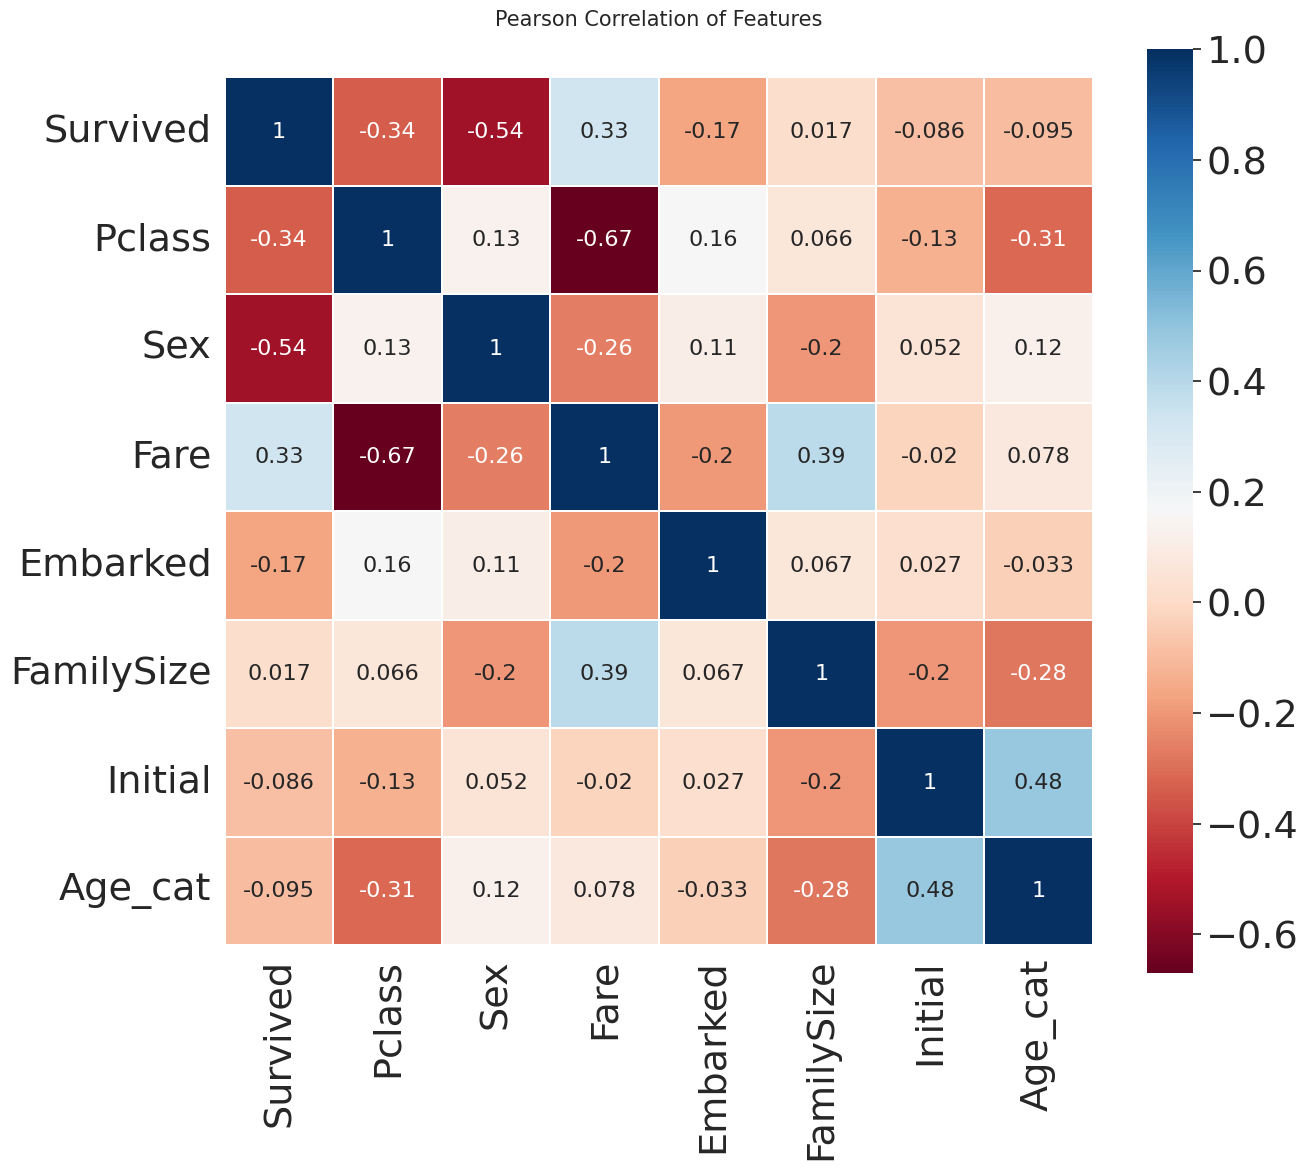

In [58]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
plt.show()

**One-hot encoding on Initial and Embarked**

In [59]:
df_train = pd.get_dummies(df_train, columns = ['Initial'],prefix = 'Initial')
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix = 'Initial')

In [60]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'Embarked')

In [61]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis = 1, inplace = True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis = 1, inplace = True)

In [62]:
df_train.drop('AgeGroup',axis =1 , inplace = True)

**Building machine learning model and prediction using the trained model**

In [63]:
#importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [64]:
X_train = df_train.drop('Survived',axis = 1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [65]:
x_tr, x_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.3, random_state = 2018)

In [66]:
model = RandomForestClassifier()
model.fit(x_tr,y_tr)
prediction = model.predict(x_vld)

In [67]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.46% 정확도로 생존을 맞춤


**Feature Importance**

In [68]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance,index=df_test.columns)

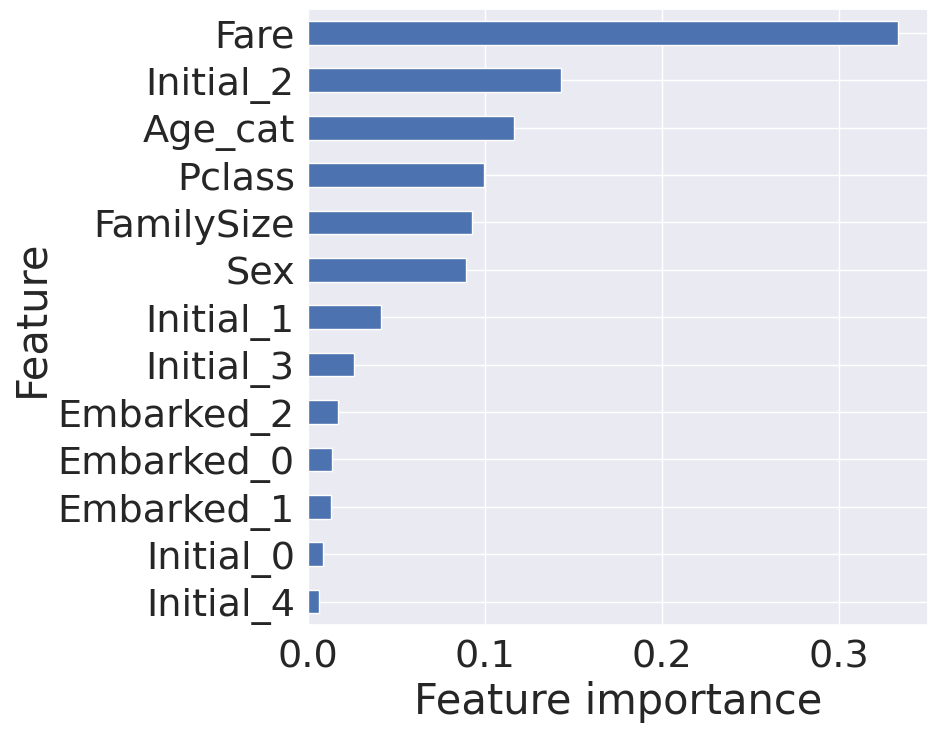

In [69]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

**Prediction on Test set**

In [70]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [71]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [72]:
prediction = model.predict(X_test)

In [73]:
submission['Survived'] = prediction

In [74]:
submission.to_csv('./my_first_submission_titanic.csv',index = False)